# Parameters

In [4]:
datasets = ['yago3-10'] # 'codex-m', 'fb15k-237', 'wnrr', 'wn18']  #, 
symbolic_models = [('anyburl', 'AnyBURL')]
subsymbolic_models = [('complex', 'ComplEx'), ('rescal', 'RESCAL')]

use_difference_psi = True
bp_threshold = 15

# Imports

In [5]:
%run utils.ipynb
%run graphs.ipynb
%run format_predictions.ipynb

from matplotlib.backends.backend_pdf import PdfPages
import os
import pandas as pd

# Analysis

Working on yago3-10 - AnyBURL - ComplEx


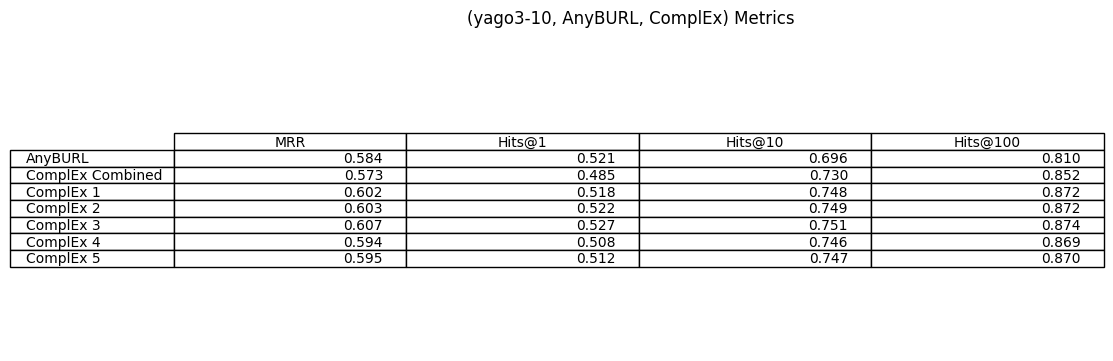

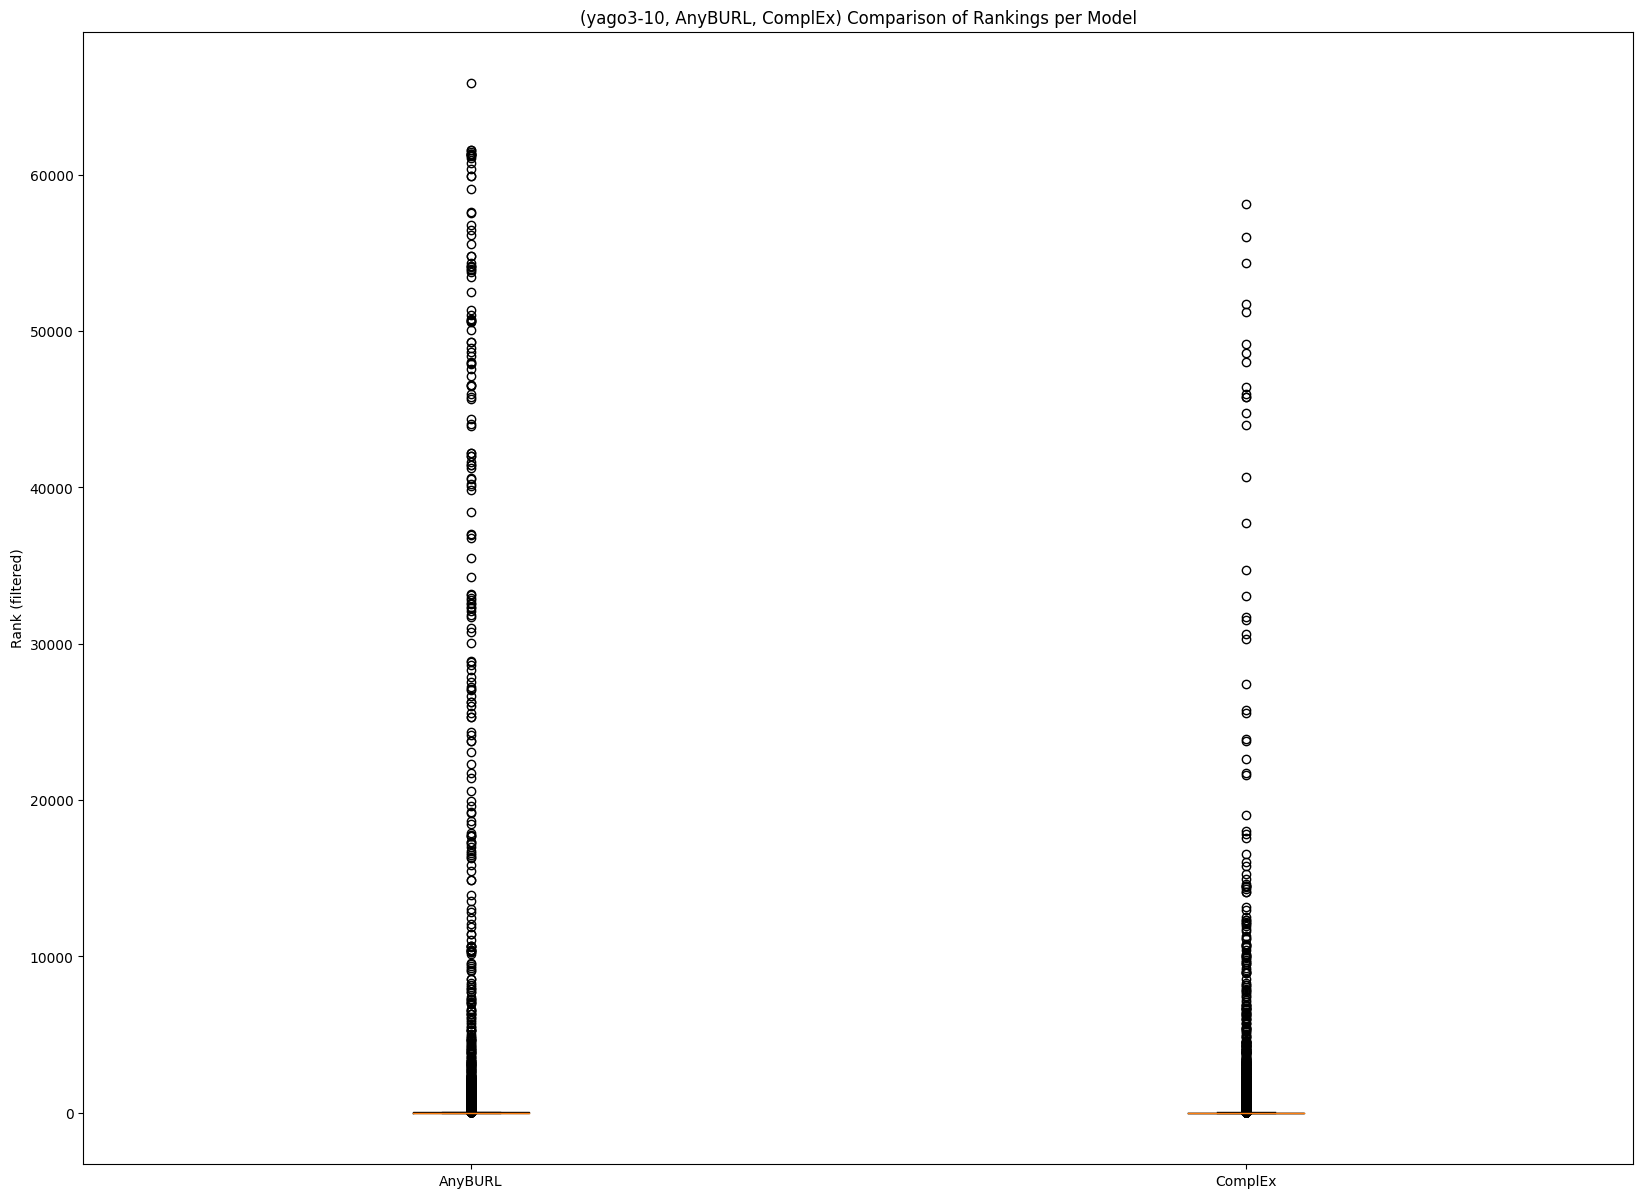

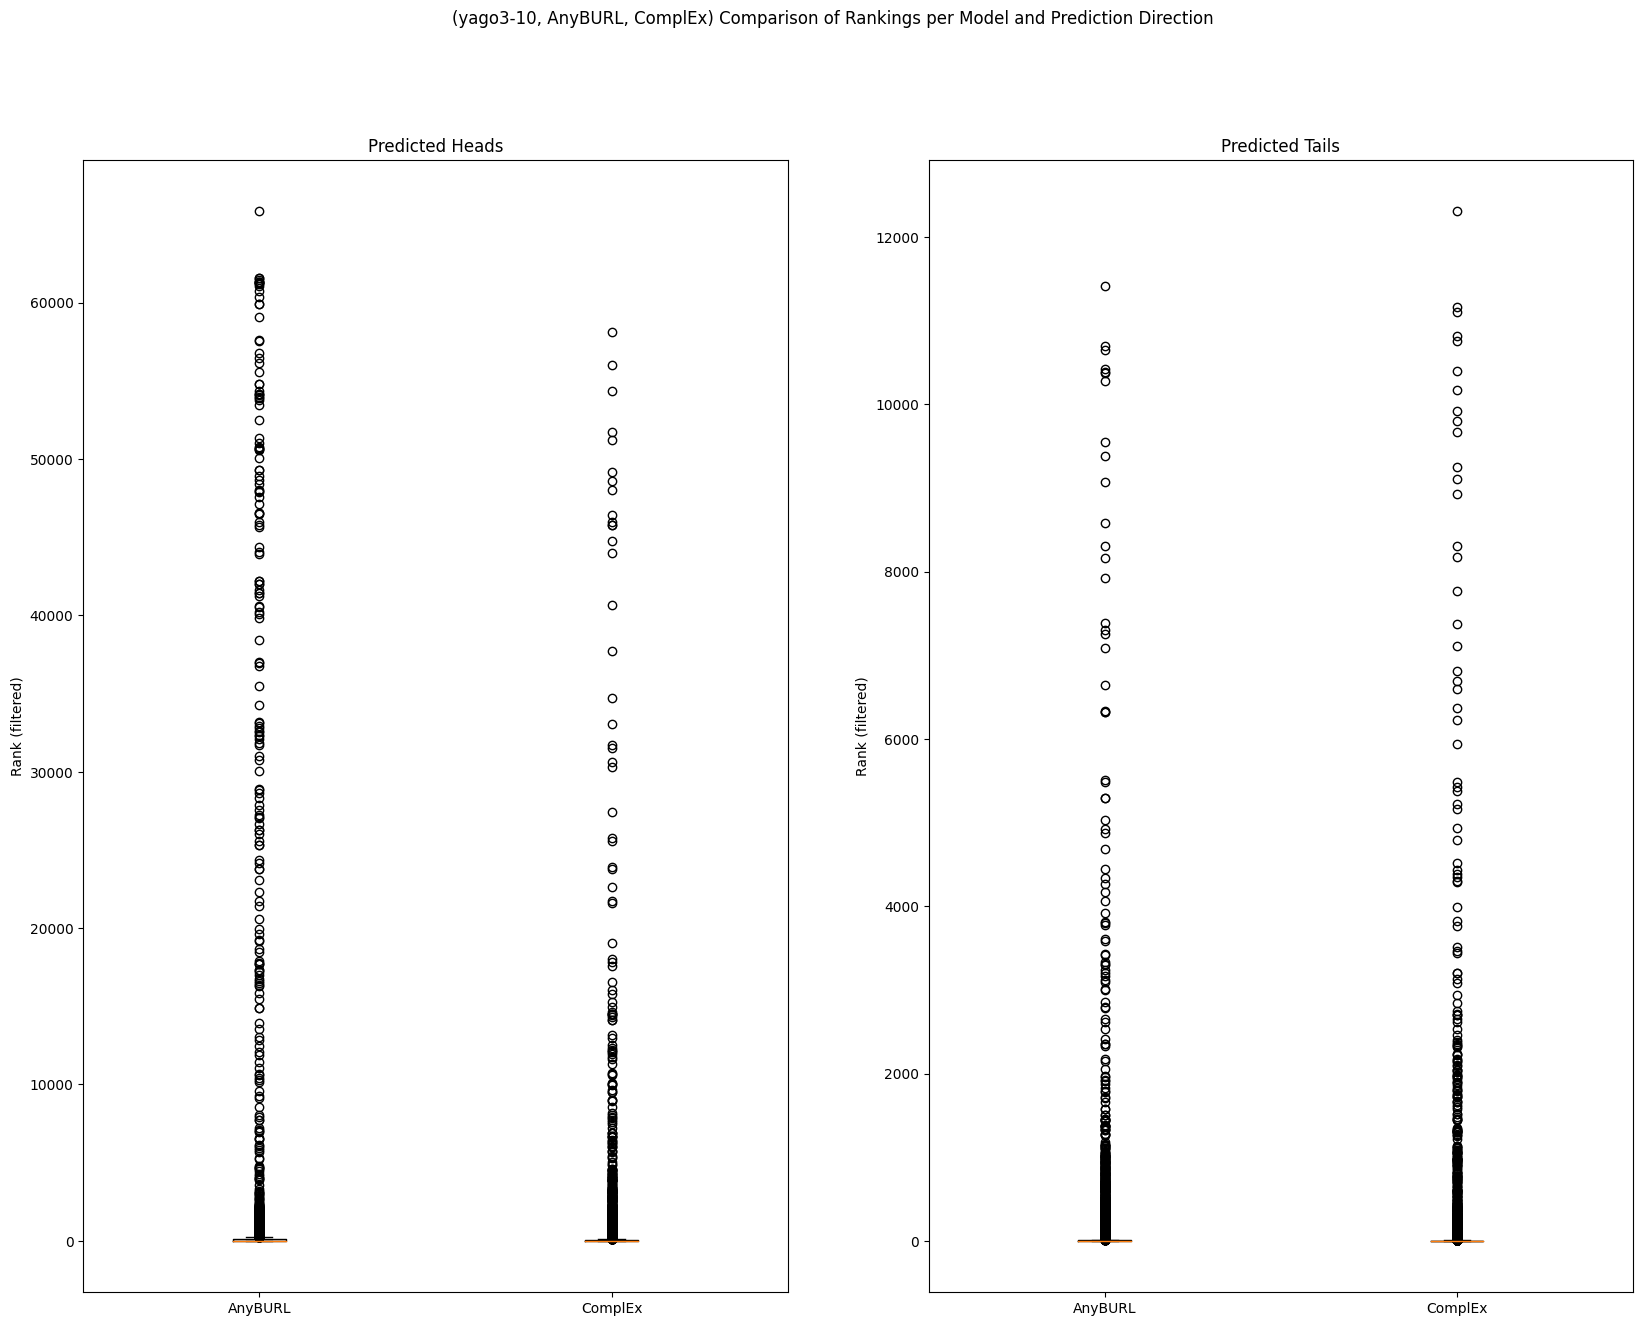

157746.28428927678


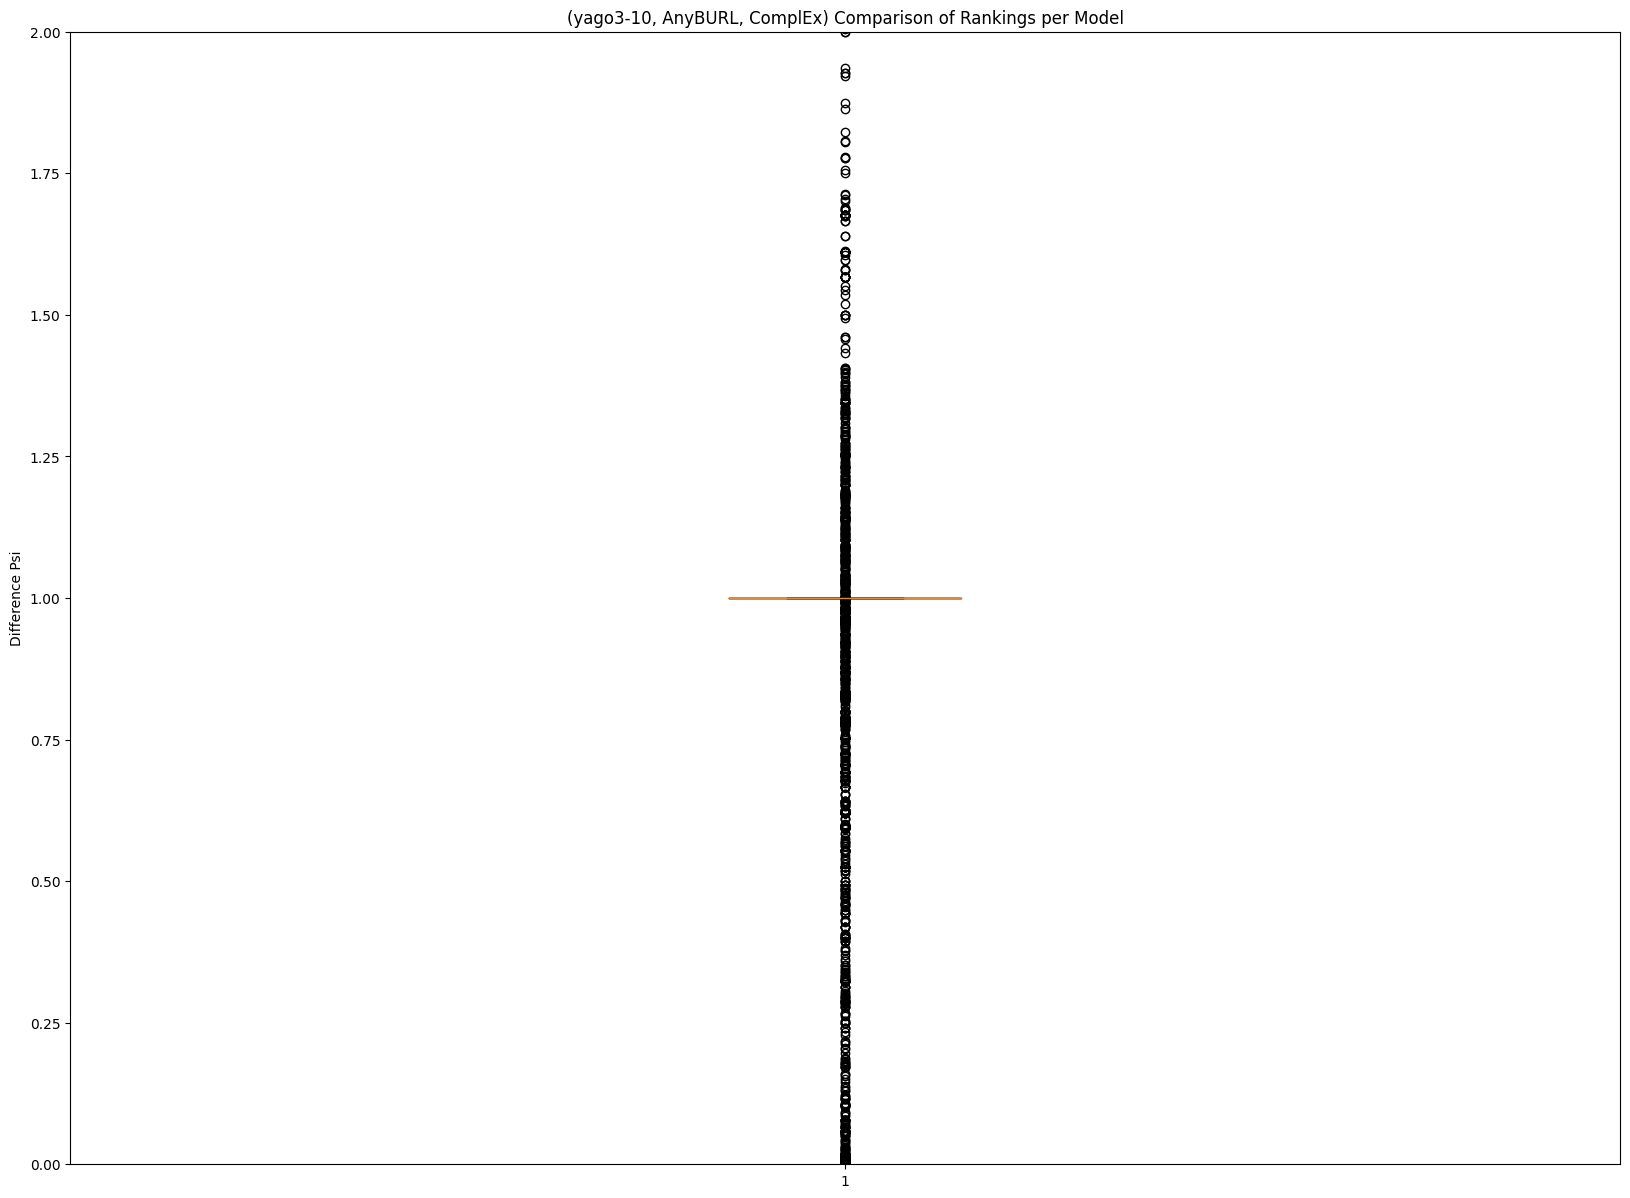

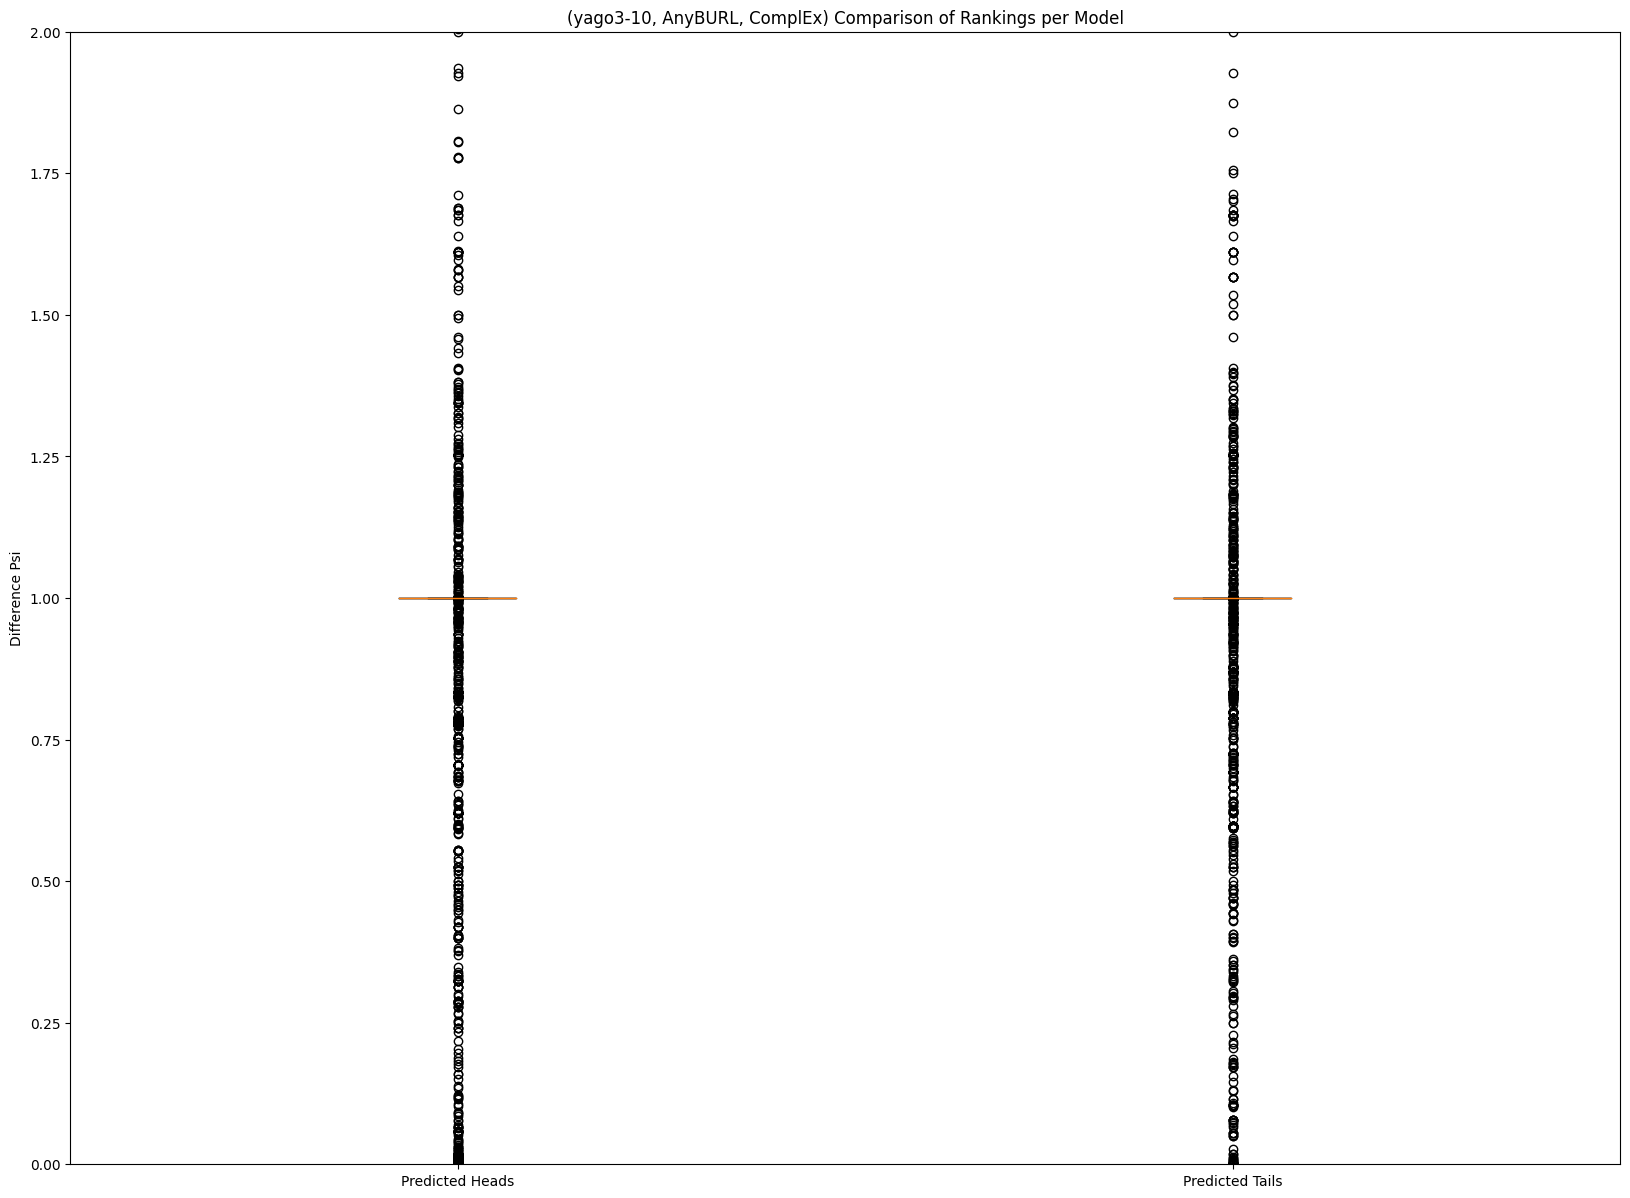

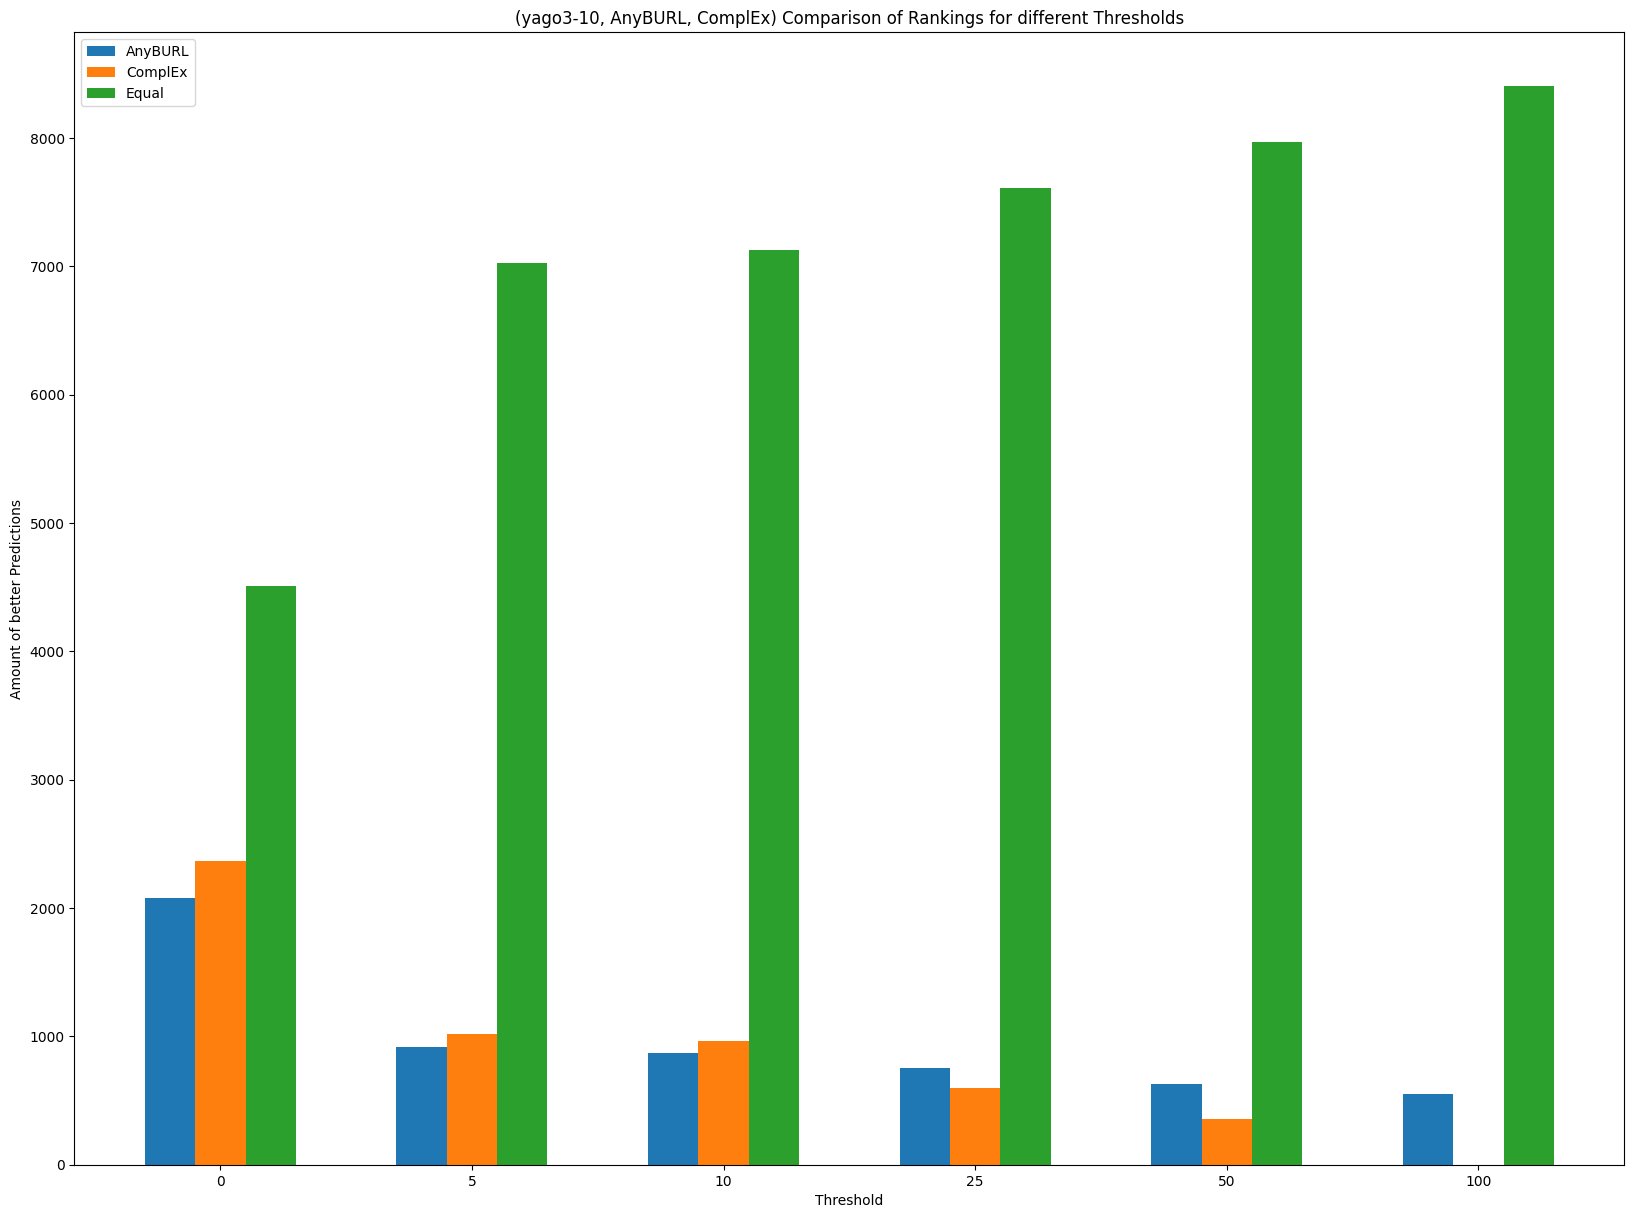

using precalculated values from temp\_get_relation_frequency_in_training_data-yago3-10.txt


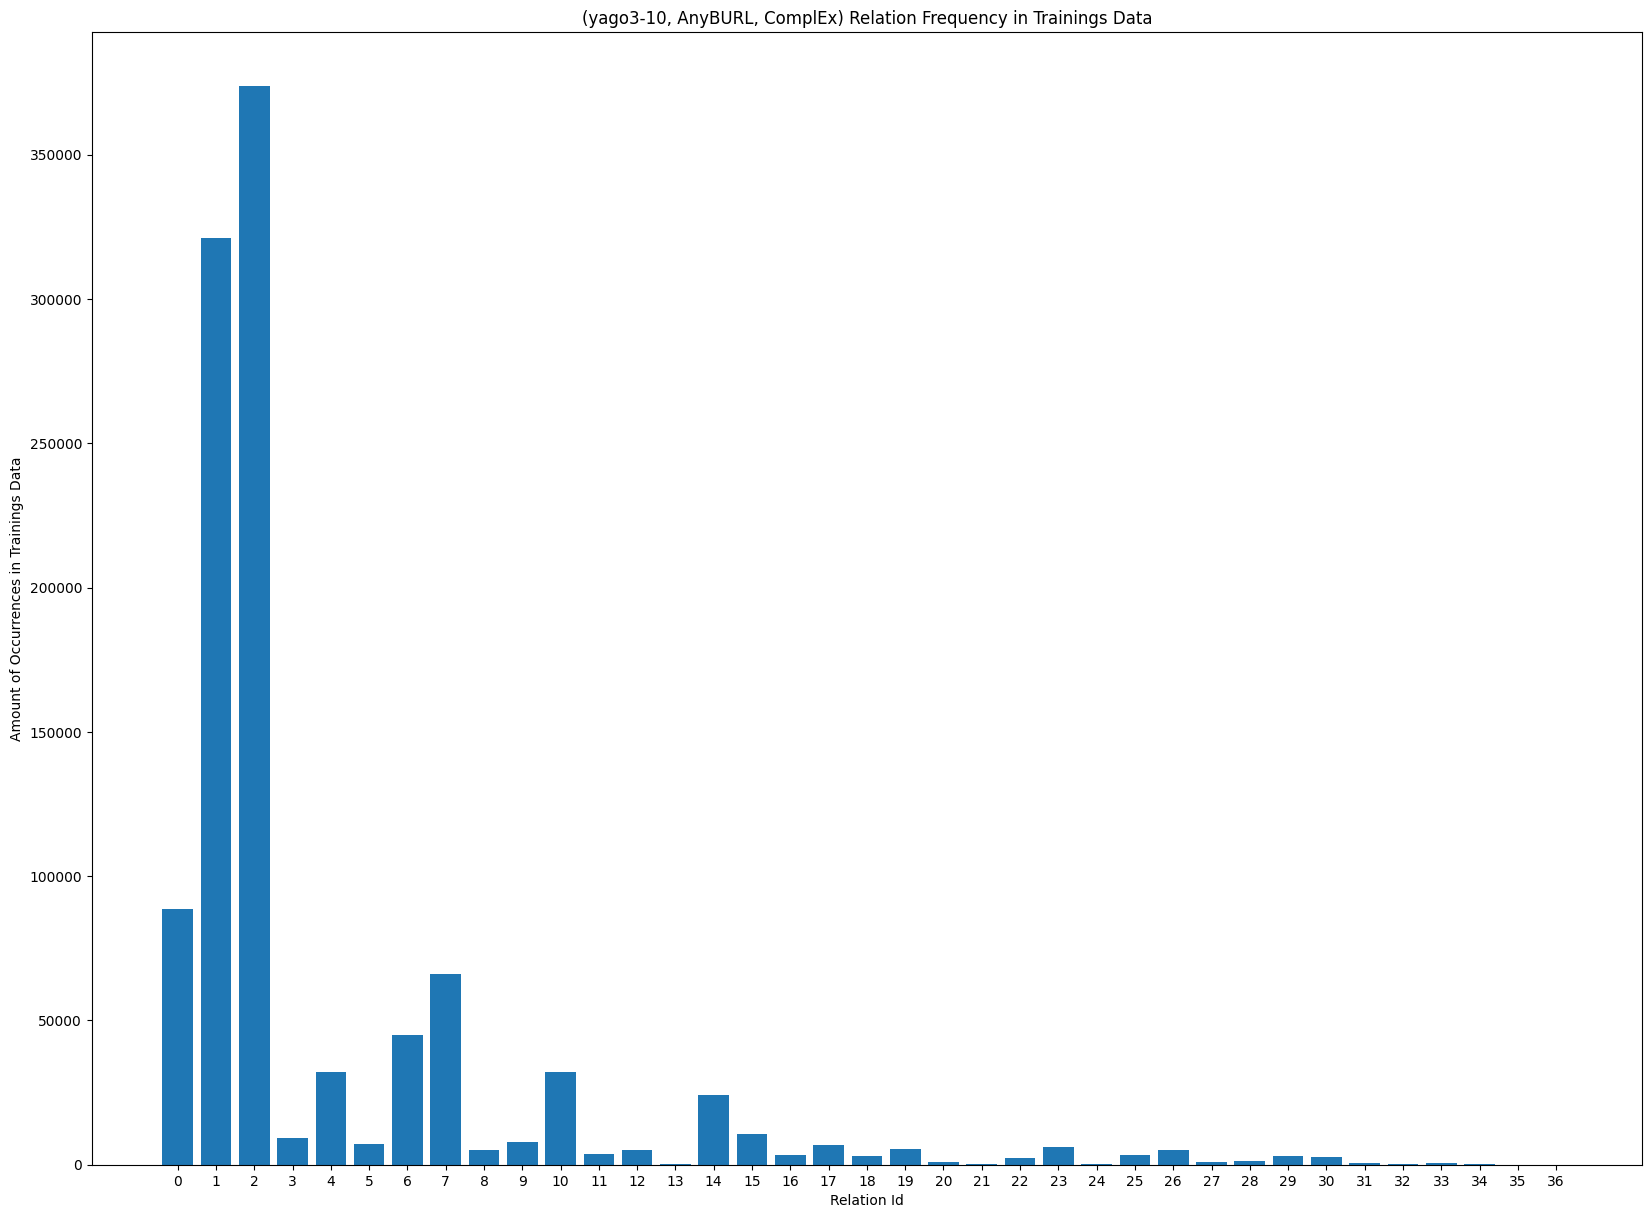

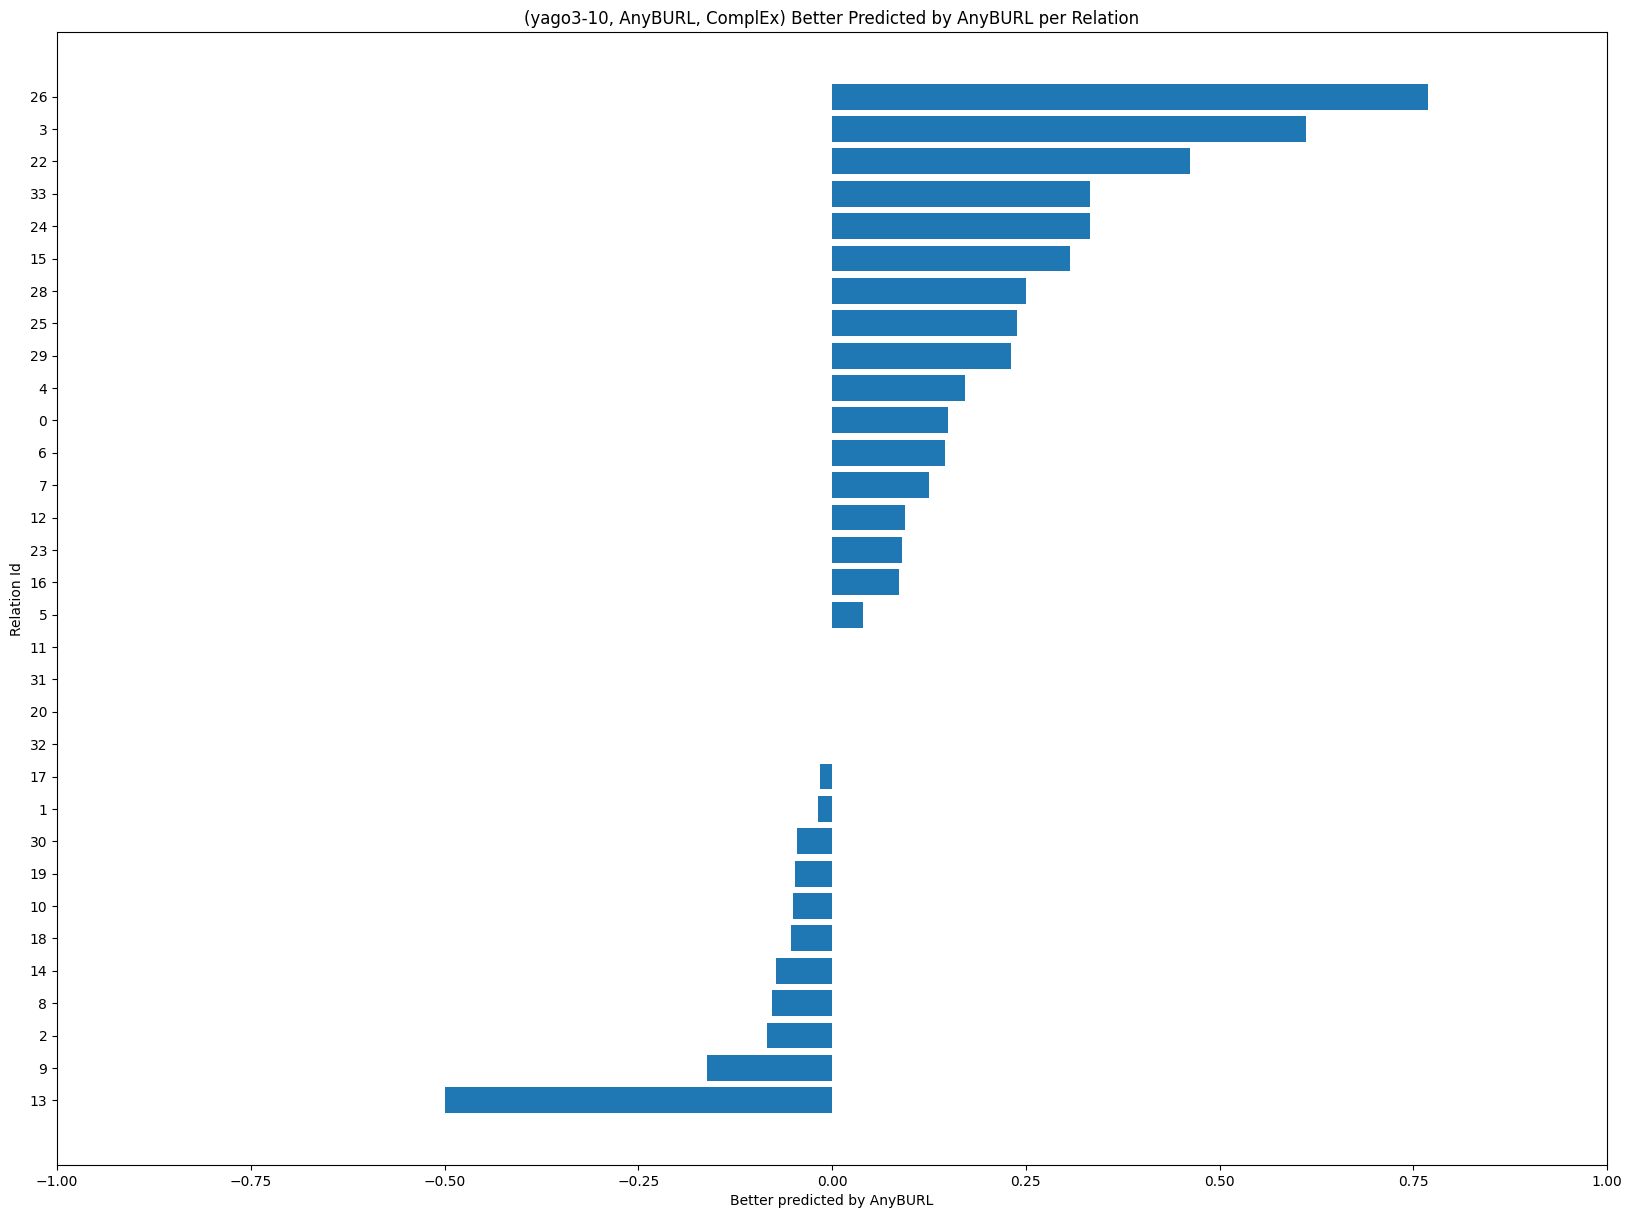

using precalculated values from temp\_get_relation_frequency_in_training_data-yago3-10.txt


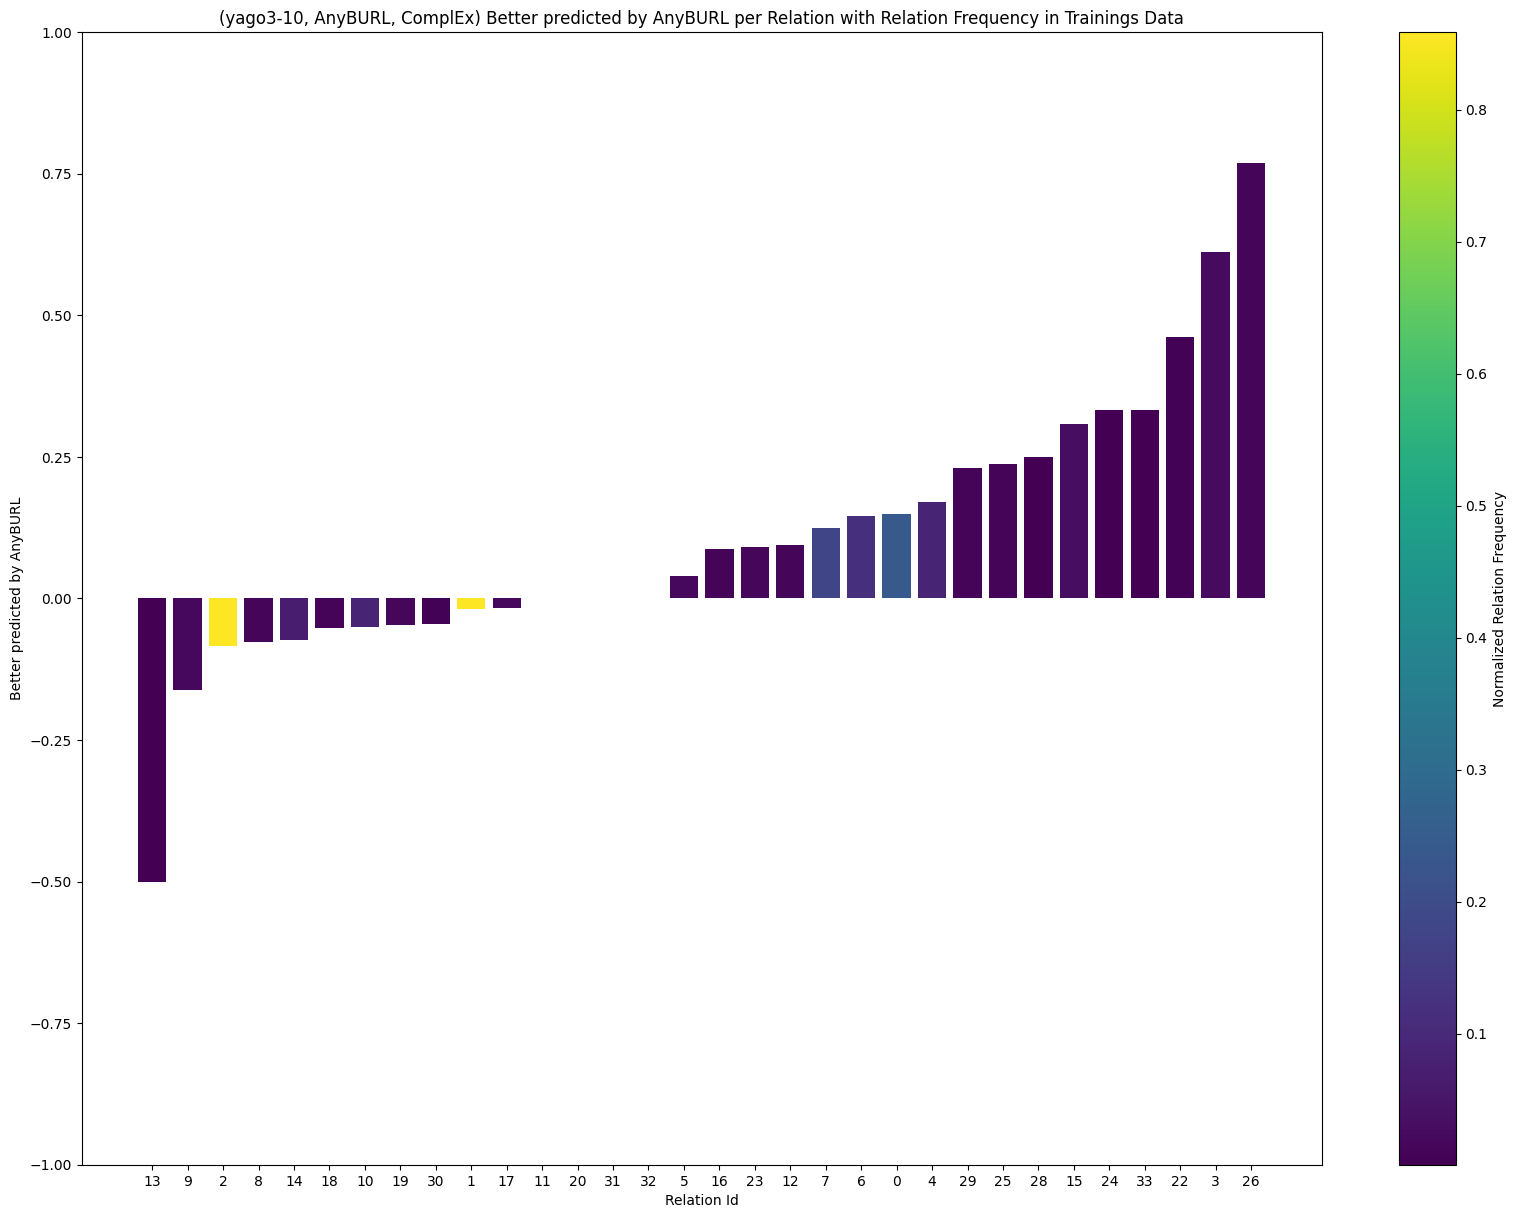

using precalculated values from temp\_get_relation_frequency_in_training_data-yago3-10.txt


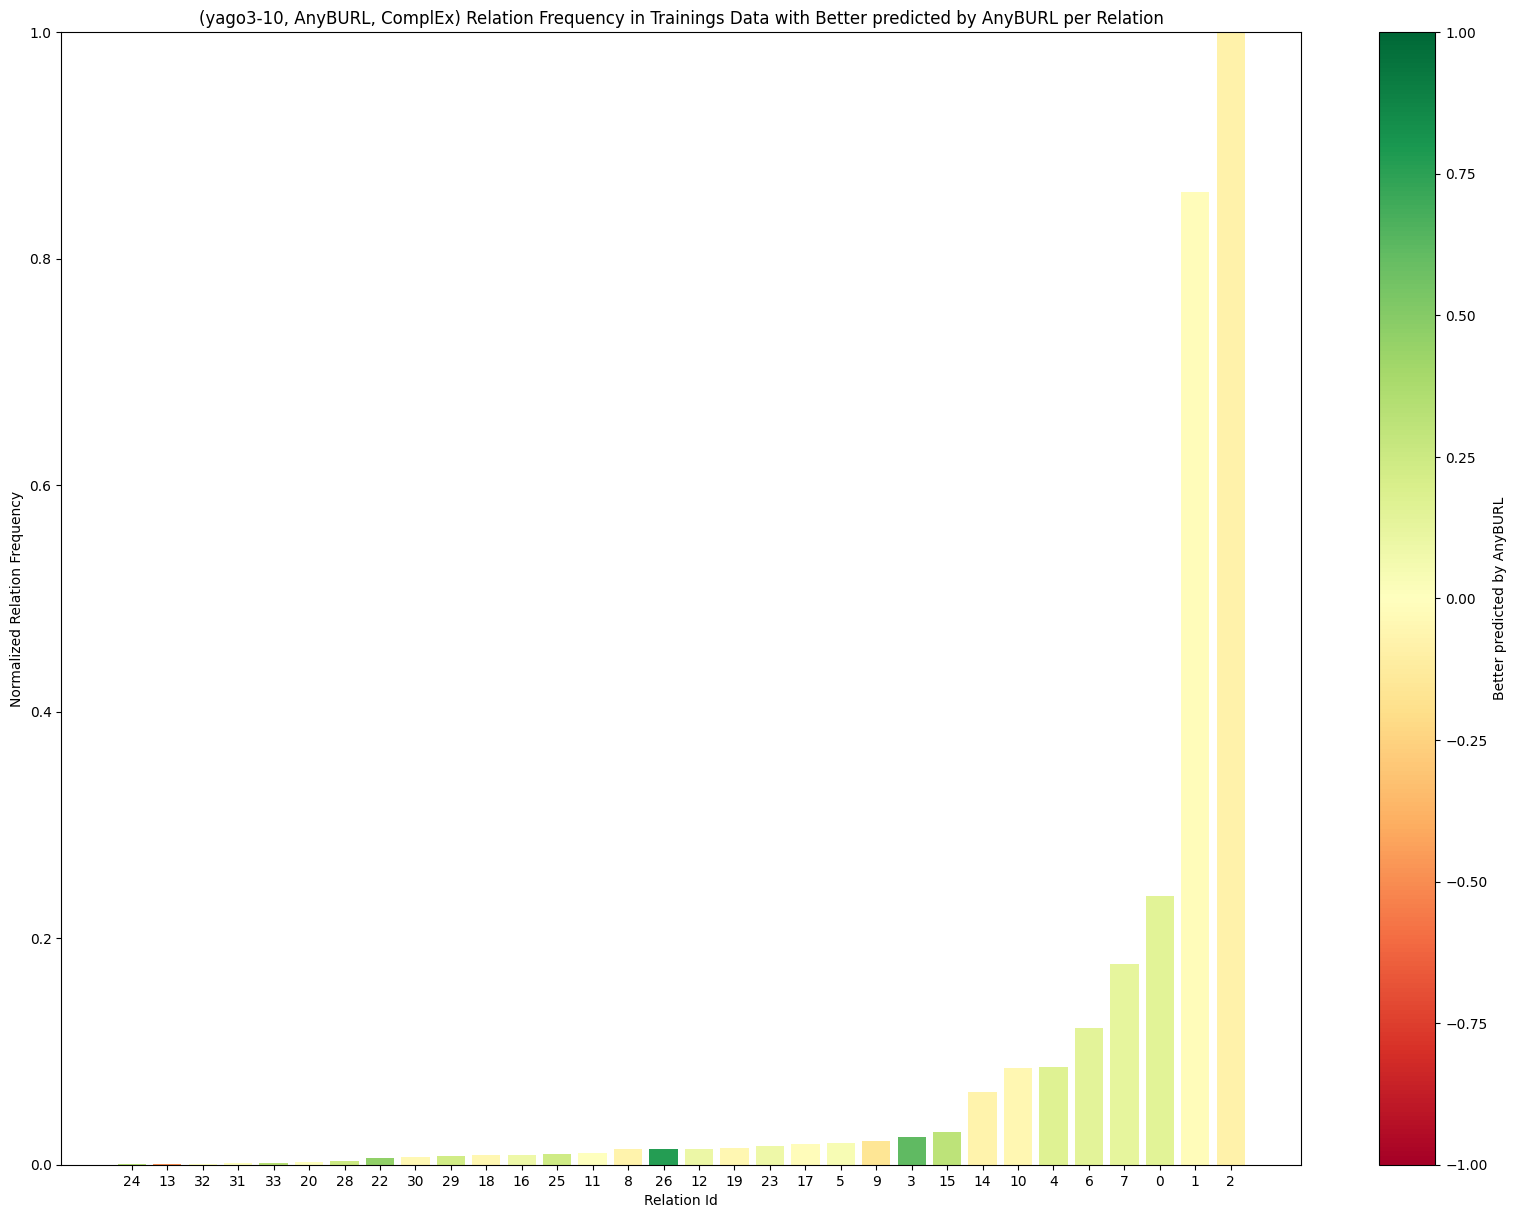

using precalculated values from temp\_get_relation_frequency_in_training_data-yago3-10.txt


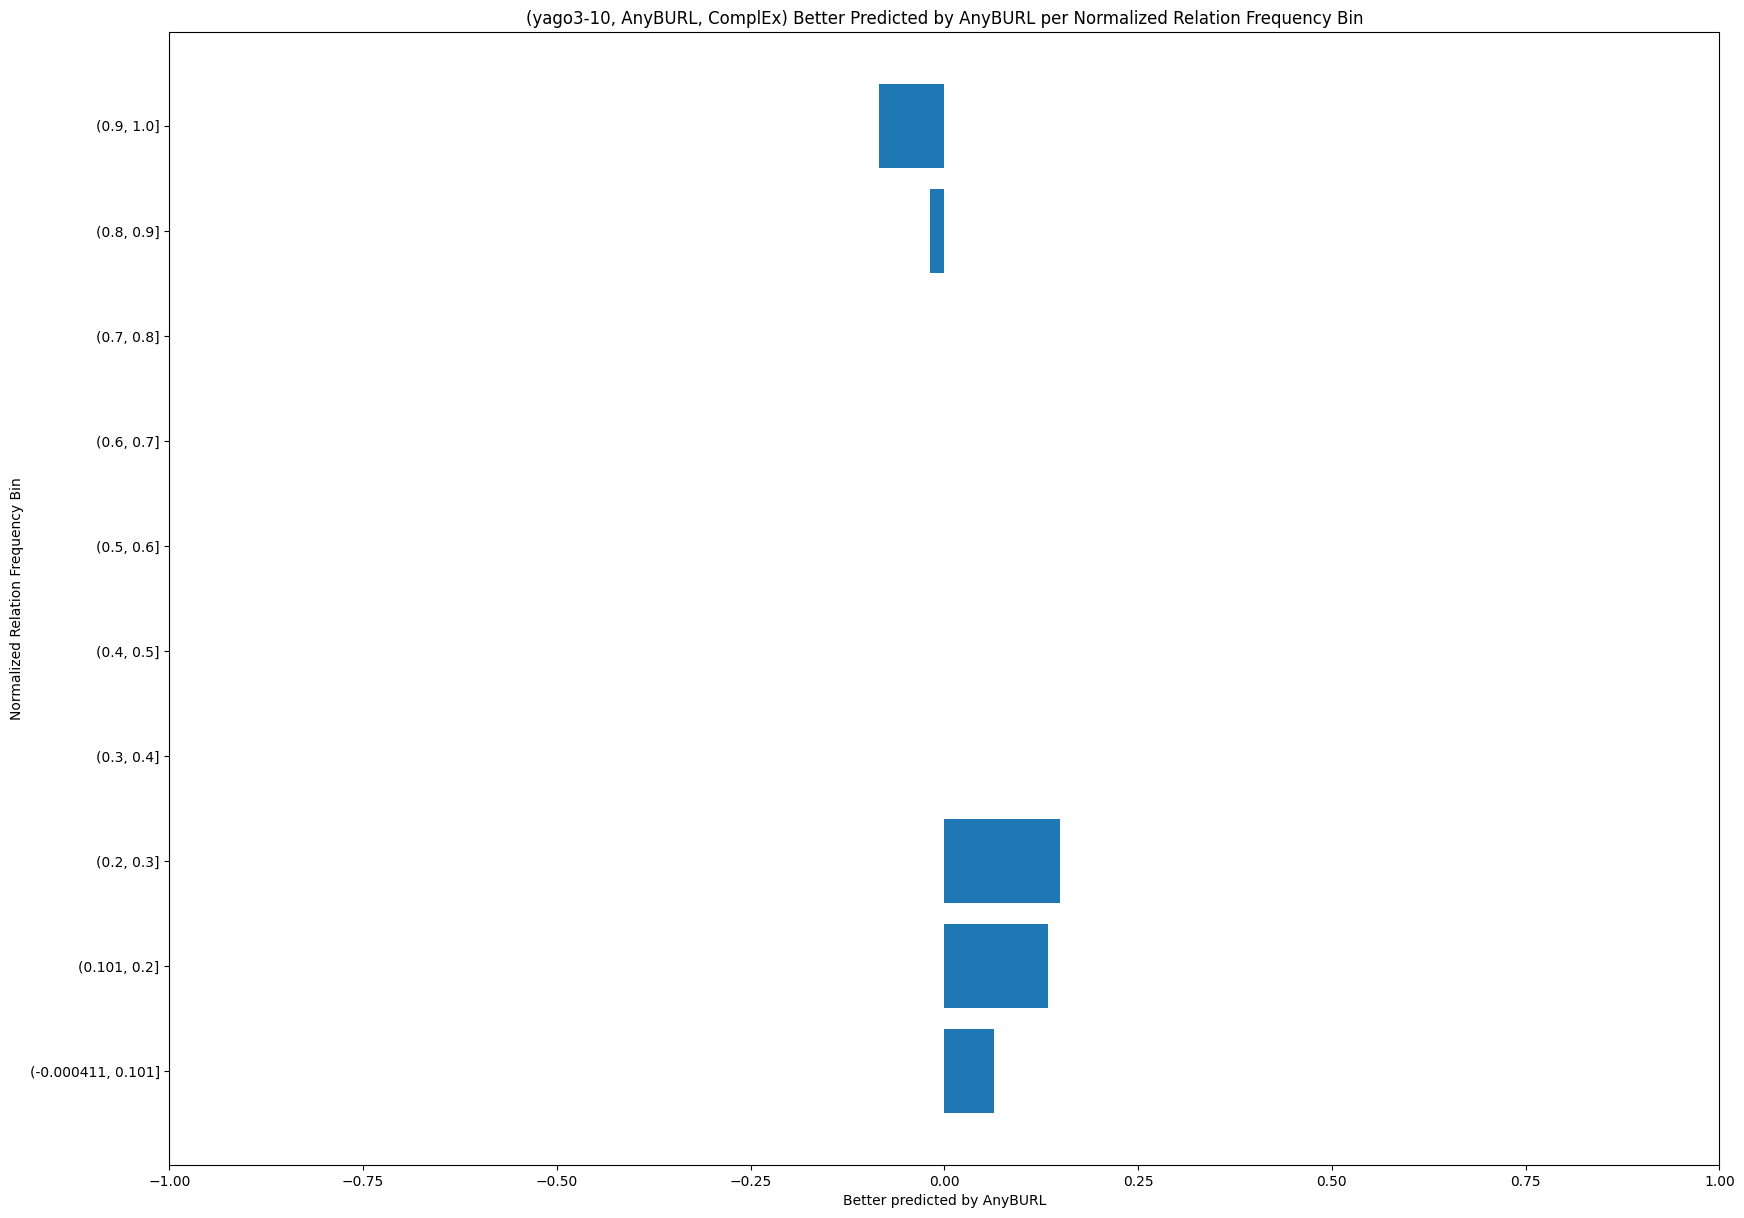

using precalculated values from temp\_get_relation_classes-experiments-yago3-10_complex_1-checkpoint_best-pt.txt


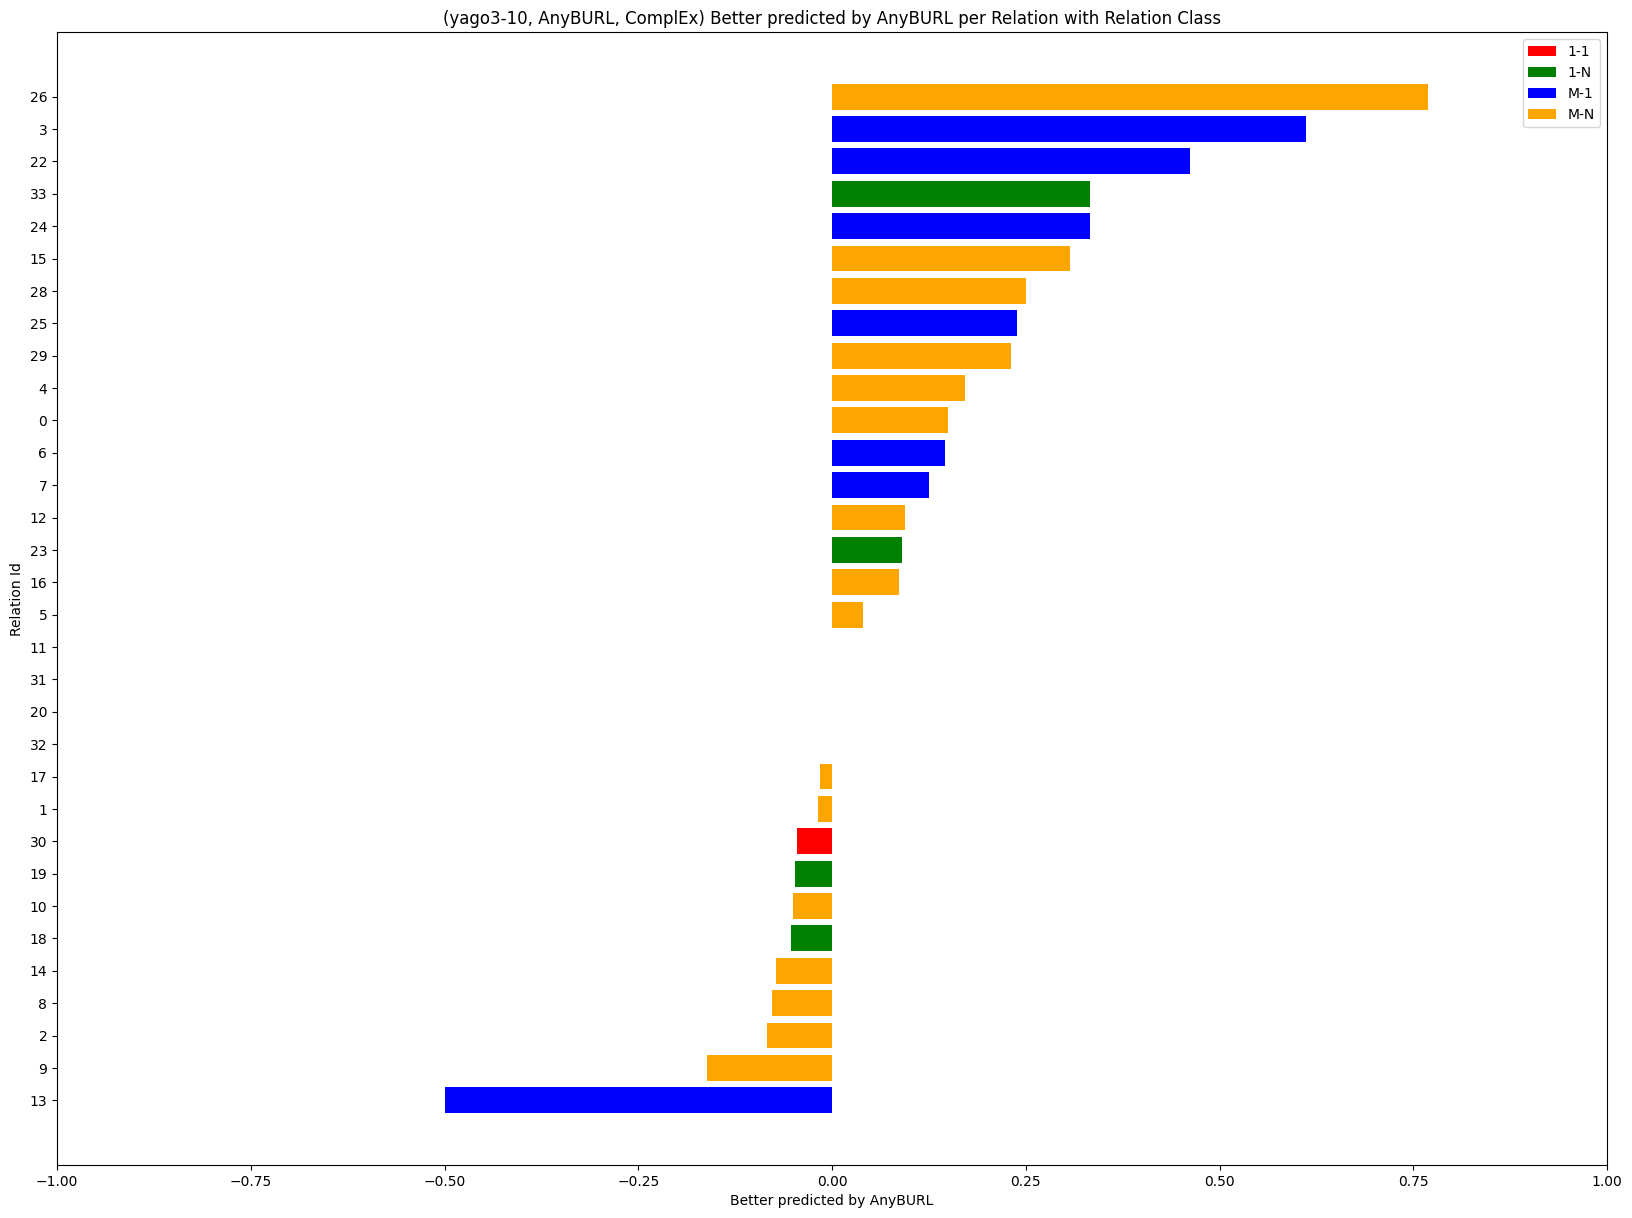

using precalculated values from temp\_get_relation_classes-experiments-yago3-10_complex_1-checkpoint_best-pt.txt


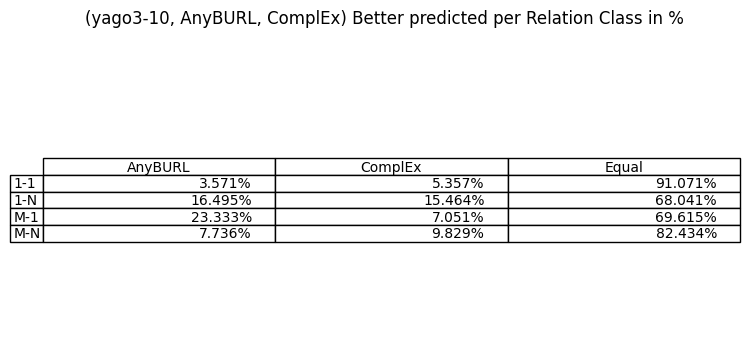

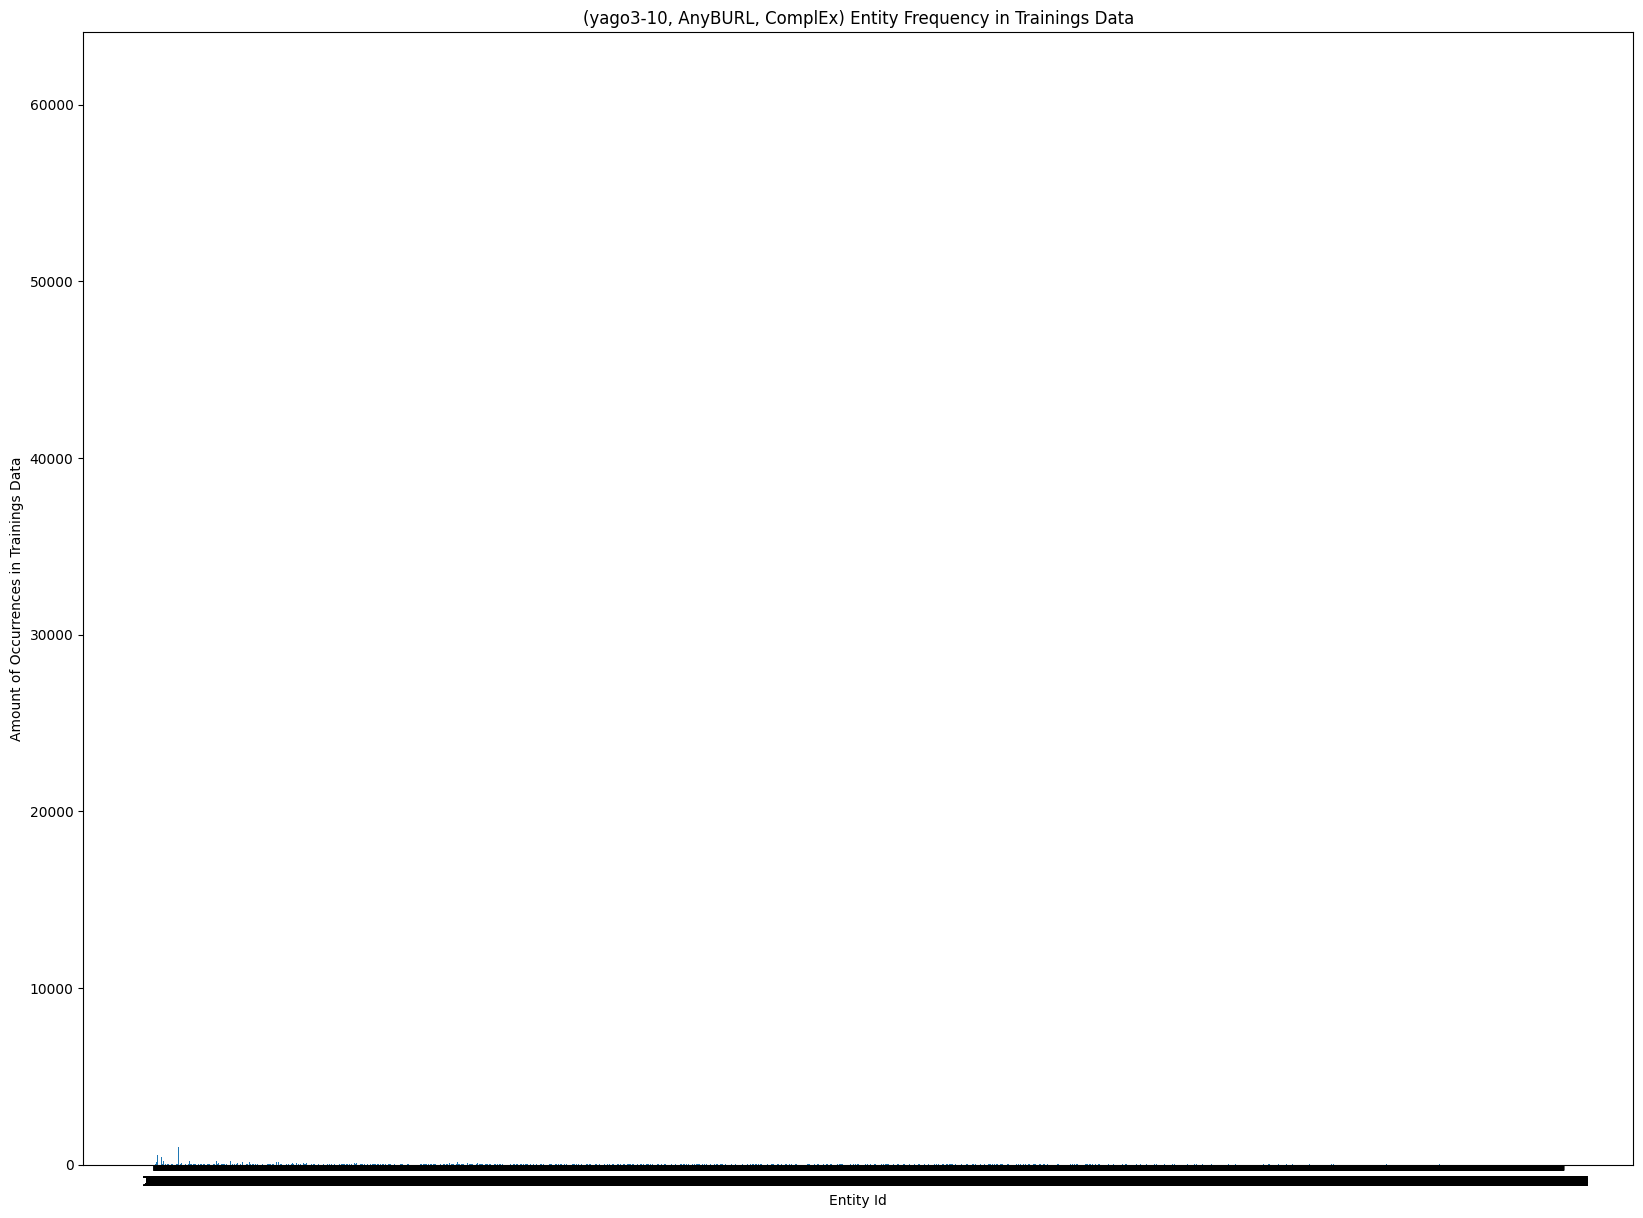

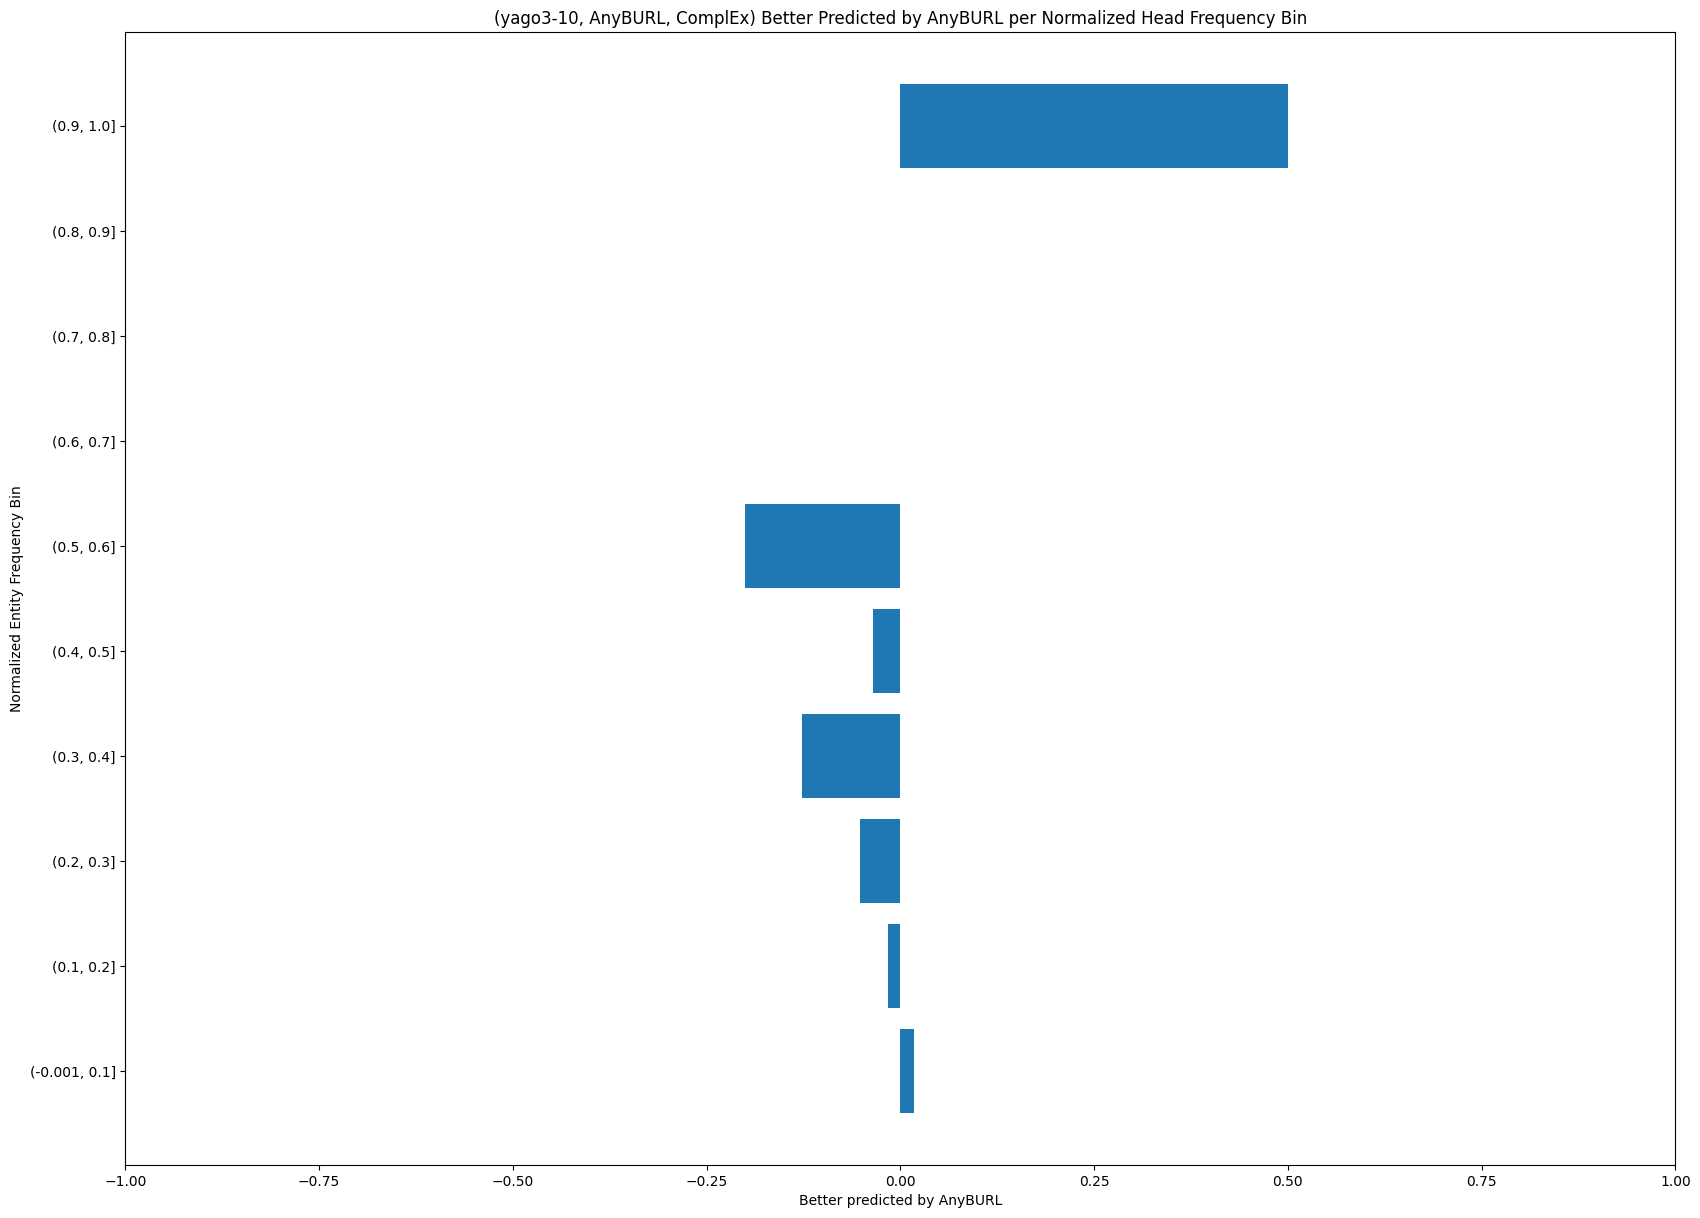

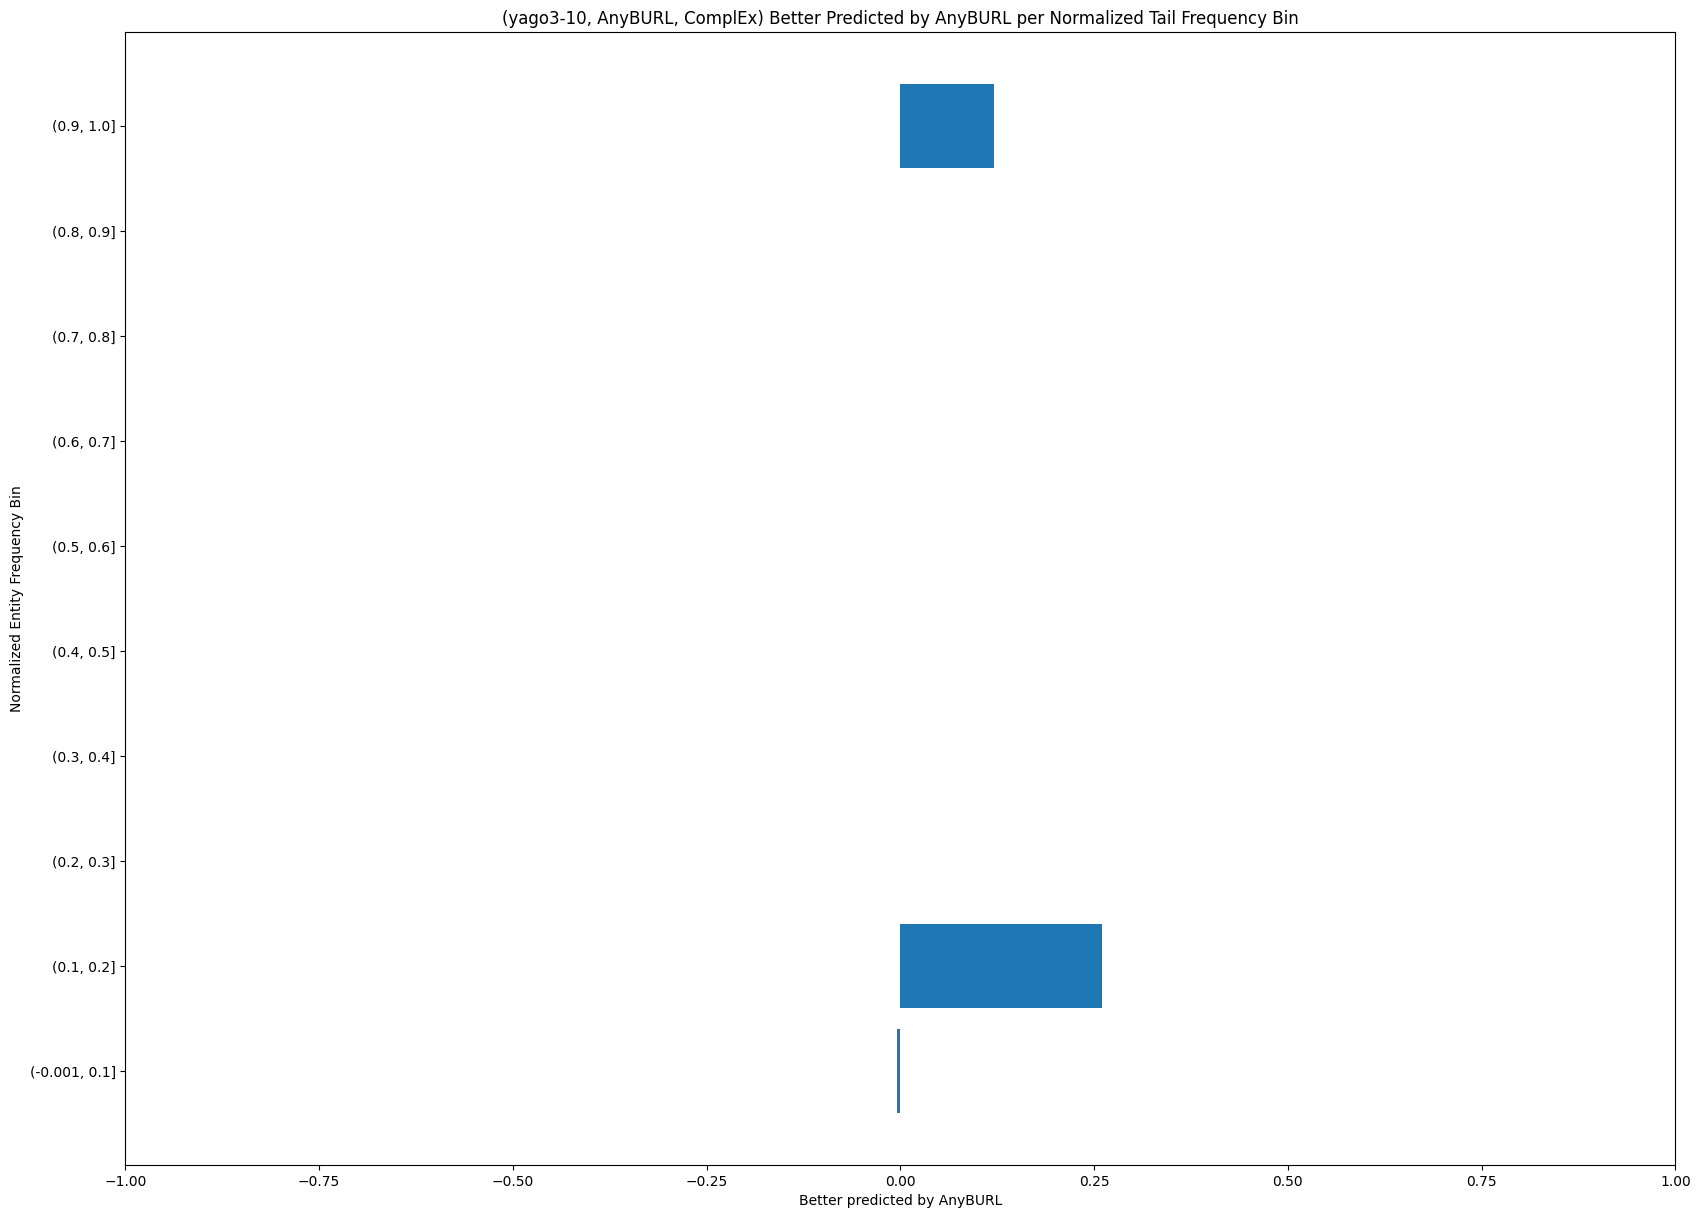

Loading configuration of dataset yago3-10 from d:\files\git\kge\data\yago3-10 ...
Setting complex.entity_embedder.dropout to 0., was set to -0.3128825817257166.


UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 1825: character maps to <undefined>

In [6]:
for dataset_name in datasets:
    for (symbolic, symbolic_name) in symbolic_models:
        for (subsymbolic, subsymbolic_name) in subsymbolic_models:
            if os.path.exists(os.path.join('experiments', f'{dataset_name}_{symbolic}')) and os.path.exists(os.path.join('experiments', f'{dataset_name}_{subsymbolic}_1')):
                print(f'Working on {dataset_name} - {symbolic_name} - {subsymbolic_name}')
                df = get_prediction_data(dataset_name, symbolic, subsymbolic)
                df = df[['h_id', 'r_id', 't_id', 'predicted_head', 'rank_filtered_anyburl', 'rank_filtered_kge', 'rank_filtered_kge_0', 'rank_filtered_kge_1', 'rank_filtered_kge_2', 'rank_filtered_kge_3', 'rank_filtered_kge_4', 'difference_psi']]
                df = df.dropna()
                pdf = PdfPages(os.path.join('analysis', f'analysis_for_{get_formatted_data_name(dataset_name, symbolic, subsymbolic)[0:-4]}.pdf'))
                show_all_graphs(df, dataset_name, use_difference_psi, bp_threshold)
                pdf.close()
            else: 
                print(f'missing data to create an analysis for {dataset_name}-{symbolic_name}-{subsymbolic_name}')